In [1]:
import Random
using Plots
using Statistics
using Printf

To do:
   1. Separate obtaining the positive energy differences into a different function since this needs to be run
      only once before the loop over beta values starts.

In [2]:
const seed = Random.seed!(42)  # Fixing the overall seed for reproducible results by running the entire script.

# const configurations::Int32 = 10000  # Total number of configurations to be obtained
# const skip::Int32 = 100  # Configurations to be skipped

function get_positive_energies()
    ΔE = sort(unique([2*mid*(left + right + above + below) for mid in [-1, 1], left in [-1, 1], right in [-1, 1], 
                    above in [-1, 1], below in [-1, 1]]))
    positive_ΔE = Int8[ΔE for ΔE in ΔE if ΔE > 0]
    return positive_ΔE
end


function get_acceptance_probabilities(beta::Float64, positive_ΔE::Array{Int8, 1})::Array{Float64, 1}
    acceptance_probabilities::Array{Float64, 1} = Float64[exp(-beta*ΔE) for ΔE in positive_ΔE]
    return acceptance_probabilities
end

function mc_step!(state::Array{Int8, 2}, pos_ΔE::Array{Int8, 1}, acceptance_probabilities::Array{Float64, 1}, skip::Int32)
    length = size(state, 1)
    spins = length^2
    rows = rand(seed, 1:length, skip*spins)
    cols = rand(seed, 1:length, skip*spins)
    for (row, col) in zip(rows, cols)
        ΔE = 2 * state[row, col] * (state[mod1(row+1, length), col] + state[row, mod1(col+1, length)] + 
                                    state[mod1(row-1, length), col] + state[row, mod1(col-1, length)])
        if ΔE > 0 && rand(seed) > acceptance_probabilities[findfirst(isequal(ΔE), pos_ΔE)]
            continue
        end
        state[row, col] *= -1
    end
    return
end

function ising2d(beta_values::Array{Float64, 1}, length::Int32, configurations::Int32, skip::Int32)
    spins::Int32 = length^2
    mean_magnetization = Float64[]
    positive_ΔE::Array{Int8, 1} = get_positive_energies()
    start = time()
    for beta in beta_values
        println("β = ", beta)
        state = -ones(Int8, (length, length))
        acceptance_probabilities::Array{Float64, 1} = get_acceptance_probabilities(beta, positive_ΔE)
        magnetisation = sum(state)/spins  # Calculate the value of the magnetisation apart so that it is immutable.
        magnetisation_values = Float64[magnetisation]
        for _ in 1:configurations
            mc_step!(state, positive_ΔE, acceptance_probabilities, skip)
            magnetisation = sum(state)/spins
            push!(magnetisation_values, magnetisation)
        end
        mean_value = abs(mean(magnetisation_values))
        push!(mean_magnetization, mean_value)
    end
    elapsed = time() - start
    println(elapsed)
    return mean_magnetization
end

ising2d (generic function with 1 method)

β = 0.0
β = 0.02210526315789474
β = 0.04421052631578948
β = 0.06631578947368422
β = 0.08842105263157896
β = 0.11052631578947368
β = 0.13263157894736843
β = 0.15473684210526314
β = 0.1768421052631579
β = 0.19894736842105265
β = 0.22105263157894736
β = 0.2431578947368421
β = 0.26526315789473687
β = 0.28736842105263155
β = 0.3094736842105263
β = 0.33157894736842103
β = 0.3536842105263158
β = 0.37578947368421056
β = 0.3978947368421053
β = 0.42
β = 0.43
β = 0.4303389830508475
β = 0.43067796610169495
β = 0.43101694915254235
β = 0.4313559322033898
β = 0.4316949152542373
β = 0.43203389830508476
β = 0.43237288135593216
β = 0.43271186440677967
β = 0.4330508474576271
β = 0.4333898305084746
β = 0.433728813559322
β = 0.4340677966101695
β = 0.43440677966101693
β = 0.43474576271186444
β = 0.43508474576271183
β = 0.4354237288135593
β = 0.4357627118644068
β = 0.43610169491525425
β = 0.43644067796610164
β = 0.43677966101694915
β = 0.4371186440677966
β = 0.4374576271186441
β = 0.43779661016949156
β = 0.4

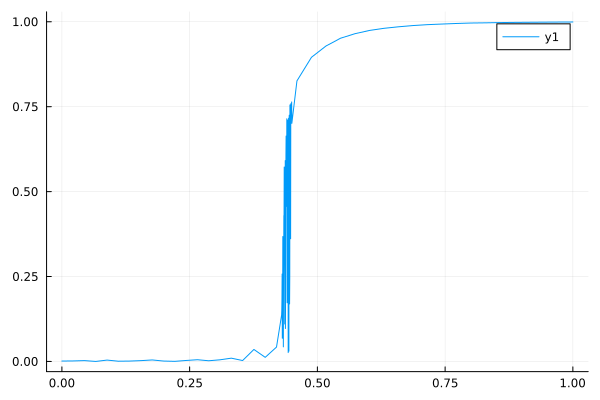

In [3]:
a = Float64[i/100 for i in range(0, 42, length=20)]
c = Float64[i/100 for i in range(46, 100, length=20)]
b = Float64[i/100 for i in range(43, 45, length=60)]
beta_values = Float64[a; b; c]

const length::Int32 =30
const configurations ::Int32 = 1000
const skip::Int32 = 10

mean_magnetization = ising2d(beta_values, length, configurations, skip)

plot(beta_values, mean_magnetization)

In [ ]:
plot(beta_values, mean_magnetization, seriestype = :scatter)

In [ ]:
import Random

function get_positive_energies()
    pos_ΔE = sort(unique(Int8[2*mid*(left+right+above+below) for mid=[-1, 1], left=[-1, 1], right=[-1, 1],
                    above=[-1, 1], below=[-1, 1] if 2*mid*(left + right + above + below) > 0]))
    return pos_ΔE
end

function get_acceptance_probabilities(beta::Float64, pos_ΔE::Array{Int8, 1})::Array{Float64, 1}
    acceptance_probabilities::Array{Float64, 1} = Float64[exp(-beta*ΔE) for ΔE in pos_ΔE]
    return acceptance_probabilities
end

length::Int32 = 30
state = -ones(Int8, (length, length))
pos_ΔE = get_positive_energies()
beta = 0.032
acceptance_probabilities::Array{Float64, 1} = get_acceptance_probabilities(beta, pos_ΔE)
skip::Int32 = 100

pos_ΔE

In [ ]:
const seed = Random.seed!(42)  # Fixing the overall seed for reproducible results by running the entire script.

function mc_step!(state::Array{Int8, 2}, acceptance_probabilities::Array{Float64, 1}, skip::Int32)
    length = size(state, 1)
    spins = length^2
    rows = rand(seed, 1:length, skip*spins)
    cols = rand(seed, 1:length, skip*spins)
    for (row, col) in zip(rows, cols)
        ΔE::Int8 = 2 * state[row, col] * (state[mod1(row+1, length), col] + state[row, mod1(col+1, length)] + 
                                          state[mod1(row-1, length), col] + state[row, mod1(col-1, length)])
        if ΔE == 4 && rand(seed) > acceptance_probabilities[1]
            continue
        elseif ΔE == 8 && rand(seed) > acceptance_probabilities[2]
            continue
        end
        state[row, col] *= -1
    end
    return
end

In [ ]:
@time mc_step!(state, acceptance_probabilities, skip)

## Clean (optimized) code

In [ ]:
import Random
using Plots
using Statistics
using Printf

const seed = Random.seed!(42)  # Fixing the overall seed for reproducible results by running the entire script.


function get_positive_energies()
    pos_ΔE = sort(unique(Int8[2*mid*(left+right+above+below) for mid=[-1, 1], left=[-1, 1], right=[-1, 1],
                    above=[-1, 1], below=[-1, 1] if 2*mid*(left + right + above + below) > 0]))
    return pos_ΔE
end


function get_acceptance_probabilities(beta::Float64, pos_ΔE::Array{Int8, 1})::Array{Float64, 1}
    acceptance_probabilities::Array{Float64, 1} = Float64[exp(-beta*ΔE) for ΔE in pos_ΔE]
    return acceptance_probabilities
end


function mc_step!(state::Array{Int8, 2}, acceptance_probabilities::Array{Float64, 1}, skip::Int32)
    length = size(state, 1)
    spins = length^2
    rows = rand(seed, 1:length, skip*spins)
    cols = rand(seed, 1:length, skip*spins)
    for (row, col) in zip(rows, cols)
        ΔE::Int8 = 2 * state[row, col] * (state[mod1(row+1, length), col] + state[row, mod1(col+1, length)] + 
                                          state[mod1(row-1, length), col] + state[row, mod1(col-1, length)])
        if ΔE == 4 && rand(seed) > acceptance_probabilities[1]
            continue
        elseif ΔE == 8 && rand(seed) > acceptance_probabilities[2]
            continue
        end
        state[row, col] *= -1
    end
    return
end


function ising2d(beta_values::Array{Float64, 1}, length::Int32, configurations::Int32, skip::Int32)
    spins::Int32 = length^2
    pos_ΔE::Array{Int8, 1} = get_positive_energies()
    mean_magnetization = Float64[]
    start = time()
    for beta in beta_values
        start2 = time()
        state = -ones(Int8, (length, length))
        acceptance_probabilities::Array{Float64, 1} = get_acceptance_probabilities(beta, pos_ΔE)
        magnetisation = sum(state)/spins  # Calculate the magnetisation apart so that it is immutable.
        for _ in 1:configurations
            mc_step!(state, acceptance_probabilities, skip)
            magnetisation += sum(state)/spins
        end
        mean_value = abs(magnetisation/configurations)
        push!(mean_magnetization, mean_value)

        elapsed = time() - start2
        println("β = ", beta, " with time = ", elapsed)
    end
    elapsed = time() - start
    println("Total time = ", elapsed)
    return mean_magnetization
end

In [ ]:
a = Float64[i/100 for i in range(0, 42, length=20)]
c = Float64[i/100 for i in range(46, 100, length=20)]
b = Float64[i/100 for i in range(43, 45, length=60)]
beta_values = Float64[a; b; c]

const length::Int32 =30
const configurations ::Int32 = 10000
const skip::Int32 = 100

mean_magnetization = ising2d(beta_values, length, configurations, skip)

plot(beta_values, mean_magnetization)